<a href="https://colab.research.google.com/github/seobbil/DA-BikeSharing-byNabs/blob/master/NB_Bike_Sharing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Data Sains : Bike Sharing
- **Nama:** Hamidah Nabila Zahra
- **Email:** hamidahnabilazahra@gmail.com
- **ID Dicoding:** seobbil


## Menentukan Pertanyaan Bisnis

- Bagaimana suhu (suhu yang dirasakan penyewa) mempengaruhi jumlah penyewa sepeda?
- Bagaimana hubungan kecepatan angin dan kelembapan terhadap jumlah penyewa?
- Bagaimana rata-rata perubahan jumlah penyewa di hari libur?
- Bagaimana tren banyak penyewa sepeda pada tahun 2012?
- Pukul berapa waktu (jam) paling banyak terjadi transaksi sewa sepeda dan paling sedikit tejadi transaksi sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### 1. Gathering Data

In [4]:
# Direktori yang berisi file CSV
data_dir="drive/MyDrive/Bike-sharing-data/"
# Membuka masing-masing dataset
day = pd.read_csv(data_dir + 'day.csv')
hour = pd.read_csv(data_dir + 'hour.csv')
data = {'day':day, 'hour':hour}
data['day'].head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data['hour'].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengumpulkan data yaitu dengan menampilkan DataFame yang akan digunakan untuk analisis data.
- Perintah head() digunakan untuk menampilkan beberapa baris pertama dari DataFrame atau Series dan secara default, head() akan menampilkan 5 baris pertama.

### 2. Assessing Data

#### 2.1 Mengecek semua tipe data

In [6]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data colum

#### 2.2 Mengecek banyak baris dan kolom

In [7]:
# Jumlah baris dan kolom
data_shape = {'Dataset': ['day.csv', 'hour.csv'],
              'Jumlah Baris': [data['day'].shape[0], data['hour'].shape[0]],
              'Jumlah Kolom': [data['day'].shape[1], data['hour'].shape[1]]}
df_shape = pd.DataFrame(data_shape)
print(df_shape)


    Dataset  Jumlah Baris  Jumlah Kolom
0   day.csv           731            16
1  hour.csv         17379            17


#### 2.3 Mengecek deskrptif statistik

In [8]:
# Statistik deskriptif untuk dataFrame
data['day'].describe(include='all'). T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [9]:
data['hour'].describe(include='all'). T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


#### 2.4 Mengecek data duplikat

In [10]:
# Inisialisasi Dictionary untuk menyimpan jumlah duplikat dan total
duplicate_counts = {}
total_sample_counts = {}

# Menghitung dan menyimpan jumlah duplikat dan total untuk tiap DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# DataFrame untuk tiap Dictionary
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)


,Total Sample Count,Duplicate Count
day,731,0
hour,17379,0


#### 2.5 Mengecek missing value

In [11]:
# Inisialisasi dictionary untuk menghitung nilai null
null_counts = {}

# Menghitung dan menyimpan banyak nilai null tiap Data Frame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

day 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

hour 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



**Insight:**
- Pada Assesing data dilakukan pengecekan tipe data pada kolom-kolom tiap DataFrame.
- Pengecekan baris dan kolom pada tiap DataFrame.
- Pengecekan deskriptif statistik pada tiap DataFrame.
- Pengecekan data duplikat dan missing value.

### 3. Cleaning Data

In [12]:
drop_col = ['instant',]

for i in day.columns:
  if i in drop_col:
    day.drop(labels=i, axis=1, inplace=True)

day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
drop_col = ['instant']

for i in hour.columns:
  if i in drop_col:
    hour.drop(labels=i, axis=1, inplace=True)

hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
data['day']['dteday'] = pd.to_datetime(data['day']['dteday'])
data['hour']['dteday'] = pd.to_datetime(data['hour']['dteday'])

In [15]:
# Mengubah angka menjadi keterangan pada day.csv

day['mnth'] = day['mnth'].map({
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
})
day['season'] = day['season'].map({
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
})
day['weekday'] = day['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day['weathersit'] = day['weathersit'].map({
    1: 'Cerah/Sebagian berawan',
    2: 'Berawan/Berkabut',
    3: 'Salju/Hujan ringan',
    4: 'Cuaca buruk'
})
day['holiday']=day['holiday'].map({
    0:'Tak libur',
    1:'Libur'
})

day['yr'] = day['yr'].map({
    0: '2011', 1: '2012'
})

day['workingday'] = day['workingday'].map({
    0: 'Liburan', 1: 'Hari kerja'
})
# Mengubah tipe data ke categorical
day['season'] = day.season.astype('category')
day['yr'] = day.yr.astype('category')
day['mnth'] = day.mnth.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['weathersit'] = day.weathersit.astype('category')

day.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Semi,2011,Januari,Tak libur,Sabtu,Liburan,Berawan/Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Semi,2011,Januari,Tak libur,Minggu,Liburan,Berawan/Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Semi,2011,Januari,Tak libur,Senin,Hari kerja,Cerah/Sebagian berawan,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Semi,2011,Januari,Tak libur,Selasa,Hari kerja,Cerah/Sebagian berawan,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Semi,2011,Januari,Tak libur,Rabu,Hari kerja,Cerah/Sebagian berawan,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
#Mengecek tipe data lagi
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

In [17]:
# Mengubah angka menjadi keterangan pada hour.csv

hour['mnth'] = hour['mnth'].map({
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
})
hour['season'] = hour['season'].map({
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
})
hour['weekday'] = hour['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
hour['weathersit'] = hour['weathersit'].map({
    1: 'Cerah/Sebagian berawan',
    2: 'Berawan/Berkabut',
    3: 'Salju/Hujan ringan',
    4: 'Cuaca buruk'
})
hour ['holiday'] = hour['holiday'].map({
    0:'Tak libur',
    1:'Libur'
})

hour['yr'] = hour['yr'].map({
    0: '2011', 1: '2012'
})

hour['workingday'] = hour['workingday'].map({
    0: 'Liburan', 1: 'Hari kerja'
})
# Mengubaha tipe data ke categorical
hour['season'] = hour.season.astype('category')
hour['yr'] = hour.yr.astype('category')
hour['mnth'] = hour.mnth.astype('category')
hour['holiday'] = hour.holiday.astype('category')
hour['weekday'] = hour.weekday.astype('category')
hour['workingday'] = hour.workingday.astype('category')
hour['weathersit'] = hour.weathersit.astype('category')

hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Semi,2011,Januari,0,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Semi,2011,Januari,1,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Semi,2011,Januari,2,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Semi,2011,Januari,3,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Semi,2011,Januari,4,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
# Mengubah nama kolom pada day.csv
day = day.rename(columns={
    'dteday': 'tanggal',
    'season': 'musim',
    'yr': 'tahun',
    'mnth': 'bulan',
    'holiday': 'holiday',
    'weekday': 'hari',
    'workingday': 'hari_kerja',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'atemp': 'suhu_terasa',
    'hum': 'kelembapan',
    'windspeed': 'kecepatan_angin',
    'casual': 'penyewa_biasa',
    'registered': 'penyewa_terdaftar',
    'cnt': 'total_penyewa'
})

day.head()


,tanggal,musim,tahun,bulan,holiday,hari,hari_kerja,cuaca,suhu,suhu_terasa,kelembapan,kecepatan_angin,penyewa_biasa,penyewa_terdaftar,total_penyewa
0,2011-01-01,Semi,2011,Januari,Tak libur,Sabtu,Liburan,Berawan/Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Semi,2011,Januari,Tak libur,Minggu,Liburan,Berawan/Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Semi,2011,Januari,Tak libur,Senin,Hari kerja,Cerah/Sebagian berawan,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Semi,2011,Januari,Tak libur,Selasa,Hari kerja,Cerah/Sebagian berawan,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Semi,2011,Januari,Tak libur,Rabu,Hari kerja,Cerah/Sebagian berawan,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Mengubah nama kolom pada hour.csv
hour = hour.rename(columns={
    'dteday': 'tanggal',
    'season': 'musim',
    'yr': 'tahun',
    'mnth': 'bulan',
    'hr':'jam',
    'holiday': 'holiday',
    'weekday': 'hari',
    'workingday': 'hari_kerja',
    'weathersit': 'cuaca',
    'temp': 'suhu',
    'atemp': 'suhu_terasa',
    'hum': 'kelembapan',
    'windspeed': 'kecepatan_angin',
    'casual': 'penyewa_biasa',
    'registered': 'penyewa_terdaftar',
    'cnt': 'total_penyewa'
})

hour.head()


,tanggal,musim,tahun,bulan,jam,holiday,hari,hari_kerja,cuaca,suhu,suhu_terasa,kelembapan,kecepatan_angin,penyewa_biasa,penyewa_terdaftar,total_penyewa
0,2011-01-01,Semi,2011,Januari,0,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Semi,2011,Januari,1,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Semi,2011,Januari,2,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Semi,2011,Januari,3,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Semi,2011,Januari,4,Tak libur,Sabtu,Liburan,Cerah/Sebagian berawan,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dilakukan perubahan tipe data kolom 'dteday' menjadi datetime pada tiap DataFrame.
- Mengubah nilai-nilai pada kolom yang diwakili dengan angka menjadi bentuk string.
- Mengubah nama kolom agar mudah dalam pembacaan data.

### 4 Simpan Cleaned Data

In [20]:
# Simpan data yang sudah bersih ke file CSV
day.to_csv("/content/drive/MyDrive/Bike-sharing-data/day-cleaned.csv", index=False)
hour.to_csv("/content/drive/MyDrive/Bike-sharing-data/hour-cleaned.csv", index=False)


## Exploratory Data Analysis (EDA)

### Explore Data day.csv dan hour.csv

In [21]:
#Rangkuman parameter statistik data day.csv
day.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
tanggal,731,NaN,NaN,NaN,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-12-31 00:00:00,NaN
musim,731,4,Gugur,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tahun,731,2,2012,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bulan,731,12,Agustus,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,731,2,Tak libur,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hari,731,7,Minggu,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hari_kerja,731,2,Hari kerja,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuaca,731,3,Cerah/Sebagian berawan,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suhu,731.0,NaN,NaN,NaN,0.495385,0.05913,0.337083,0.498333,0.655417,0.861667,0.183051
suhu_terasa,731.0,NaN,NaN,NaN,0.474354,0.07907,0.337842,0.486733,0.608602,0.840896,0.162961


In [22]:
#Rangkuman parameter statistik data hour.csv
hour.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
tanggal,17379,NaN,NaN,NaN,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
musim,17379,4,Gugur,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tahun,17379,2,2012,8734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bulan,17379,12,Juli,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jam,17379.0,NaN,NaN,NaN,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
holiday,17379,2,Tak libur,16879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hari,17379,7,Sabtu,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hari_kerja,17379,2,Hari kerja,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuaca,17379,4,Cerah/Sebagian berawan,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suhu,17379.0,NaN,NaN,NaN,0.496987,0.02,0.34,0.5,0.66,1.0,0.192556


In [23]:
# Jumlah penyewa terdaftar dan penyewa biasa per tahun dari day.csv
day.groupby(by="tahun")[['penyewa_terdaftar', 'penyewa_biasa']].sum().sort_values(by="penyewa_terdaftar", ascending=False).reset_index().head(10)


<ipython-input-23-9d8fb456d6f5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by="tahun")[['penyewa_terdaftar', 'penyewa_biasa']].sum().sort_values(by="penyewa_terdaftar", ascending=False).reset_index().head(10)


,tahun,penyewa_terdaftar,penyewa_biasa
0,2012,1676811,372765
1,2011,995851,247252


Tabel di atas menampilkan data jumlah penyewa sepeda, baik penyewa terdaftar maupun penyewa biasa, berdasarkan tahun 2011 dan 2012.

1. **Tahun 2012**:
   - Jumlah **penyewa terdaftar** mencapai **1.676.811**.
   - Jumlah **penyewa biasa** mencapai **372.765**.
   - Ini menunjukkan bahwa di tahun 2012, penggunaan sepeda oleh penyewa terdaftar dan biasa meningkat secara signifikan dibandingkan dengan tahun sebelumnya.

2. **Tahun 2011**:
   - Jumlah **penyewa terdaftar** sebanyak **995.851**.
   - Jumlah **penyewa biasa** sebanyak **247.252**.
   - Meskipun angka penyewaan masih signifikan, jumlahnya lebih rendah dibandingkan dengan tahun 2012.

Secara keseluruhan, terdapat peningkatan yang jelas baik untuk penyewa terdaftar maupun penyewa biasa dari tahun 2011 ke tahun 2012. Peningkatan ini bisa disebabkan oleh faktor-faktor seperti popularitas penggunaan sepeda, perubahan cuaca, atau kebijakan transportasi yang lebih ramah sepeda.

In [24]:
# Jumlah penyewa terdaftar dan penyewa biasa per cuaca dari day.csv
day.groupby(by="cuaca")[['penyewa_terdaftar', 'penyewa_biasa']].sum().sort_values(by="penyewa_terdaftar", ascending=False).reset_index().head(10)

<ipython-input-24-44619717ce83>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by="cuaca")[['penyewa_terdaftar', 'penyewa_biasa']].sum().sort_values(by="penyewa_terdaftar", ascending=False).reset_index().head(10)


,cuaca,penyewa_terdaftar,penyewa_biasa
0,Cerah/Sebagian berawan,1811606,446346
1,Berawan/Berkabut,827082,169776
2,Salju/Hujan ringan,33974,3895


Tabel di atas menunjukkan jumlah penyewa sepeda berdasarkan kondisi cuaca. Terdapat tiga kategori cuaca yang tercantum, yaitu:

1. **Cerah/Sebagian Berawan**: Pada kondisi cuaca ini, terdapat jumlah penyewa yang paling tinggi, dengan **1.811.606 penyewa terdaftar** dan **446.346 penyewa biasa**. Hal ini menunjukkan bahwa cuaca yang lebih cerah cenderung menarik lebih banyak penyewa, baik terdaftar maupun biasa.
   
2. **Berawan/Berkabut**: Pada kondisi cuaca yang sedikit lebih buruk, jumlah penyewa menurun, dengan **827.082 penyewa terdaftar** dan **169.776 penyewa biasa**. Cuaca ini masih mendukung aktivitas bersepeda, meskipun minat penyewa tidak setinggi saat cuaca cerah.

3. **Salju/Hujan Ringan**: Cuaca yang buruk ini menunjukkan jumlah penyewa yang jauh lebih rendah, dengan **33.974 penyewa terdaftar** dan hanya **3.895 penyewa biasa**. Kondisi cuaca ini jelas membuat orang cenderung menghindari bersepeda.

Secara keseluruhan, tabel ini memperlihatkan korelasi yang jelas antara kondisi cuaca dan jumlah penyewa sepeda, di mana cuaca yang lebih baik (cerah) menghasilkan lebih banyak penyewa dibandingkan cuaca buruk (salju/hujan).

In [25]:
# Jumlah penyewa terdaftar dan penyewa biasa pada hari kerja/libur dari day.csv
day.groupby(by="hari_kerja")[['penyewa_terdaftar', 'penyewa_biasa']].sum().sort_values(by="penyewa_terdaftar", ascending=False).reset_index().head(10)


<ipython-input-25-9bde6b69975e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by="hari_kerja")[['penyewa_terdaftar', 'penyewa_biasa']].sum().sort_values(by="penyewa_terdaftar", ascending=False).reset_index().head(10)


,hari_kerja,penyewa_terdaftar,penyewa_biasa
0,Hari kerja,1989125,303285
1,Liburan,683537,316732


Tabel di atas menunjukkan data jumlah penyewa sepeda berdasarkan status hari kerja dan hari libur, dengan rincian sebagai berikut:

1. **Hari Kerja**:
   - Jumlah **penyewa terdaftar** mencapai **1.989.125**.
   - Jumlah **penyewa biasa** hanya **303.285**.
   - Hal ini menunjukkan bahwa pada hari kerja, mayoritas penyewa sepeda adalah penyewa terdaftar, yang mungkin menggunakan sepeda untuk tujuan komuter atau aktivitas harian.

2. **Liburan**:
   - Jumlah **penyewa terdaftar** adalah **683.537**, jauh lebih sedikit dibandingkan hari kerja.
   - Namun, jumlah **penyewa biasa** adalah **316.732**, yang sedikit lebih tinggi daripada hari kerja.
   - Ini menunjukkan bahwa pada hari libur, penggunaan sepeda oleh penyewa biasa lebih tinggi, kemungkinan untuk rekreasi atau kegiatan santai.

Pada hari kerja, sepeda lebih banyak digunakan oleh penyewa terdaftar, mungkin untuk keperluan rutin, sedangkan pada hari libur, penyewaan sepeda oleh penyewa biasa meningkat, menandakan penggunaan sepeda lebih bersifat rekreasi.

**Insight:**
- Ditampilkan kembali deskriptif statistik pada tiap DataFrame (karena mungkin terjadi perubahan akibat cleaning data)
- Melakukan analisis data eksploratif pada tiap DataFrame


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana suhu (suhu yang dirasakan penyewa) mempengaruhi jumlah penyewa sepeda?

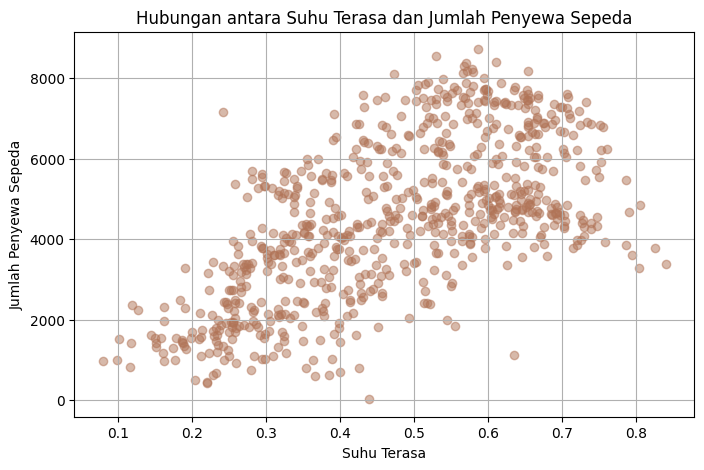

In [26]:

plt.figure(figsize=(8, 5))
plt.scatter(day['suhu_terasa'], day['total_penyewa'], alpha=0.5, color='#B17457')
plt.xlabel('Suhu Terasa')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.title('Hubungan antara Suhu Terasa dan Jumlah Penyewa Sepeda')
plt.grid(True)
plt.show()


### Pertanyaan 2: Bagaimana hubungan kecepatan angin dan kelembapan terhadap jumlah penyewa?

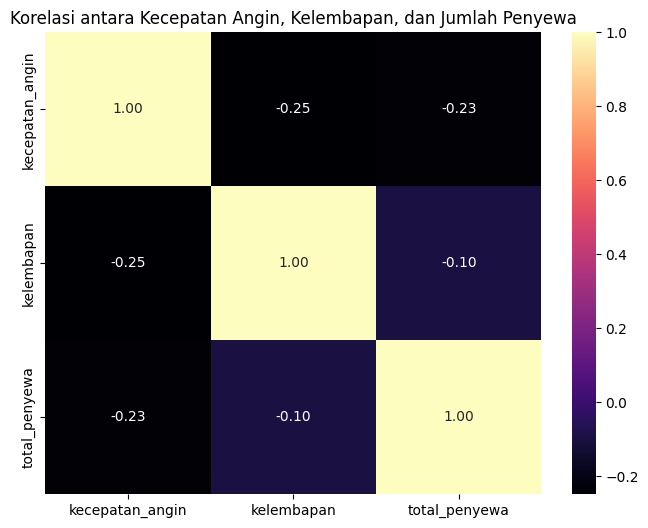

In [27]:
correlation_matrix = day[['kecepatan_angin', 'kelembapan', 'total_penyewa']].corr()
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Korelasi antara Kecepatan Angin, Kelembapan, dan Jumlah Penyewa')
plt.show()


### Pertanyaan 3: Bagaimana rata-rata perubahan jumlah penyewa di hari libur?

<ipython-input-28-1fda8dc9c8c8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_rental_counts = hour.groupby('holiday')['total_penyewa'].mean()


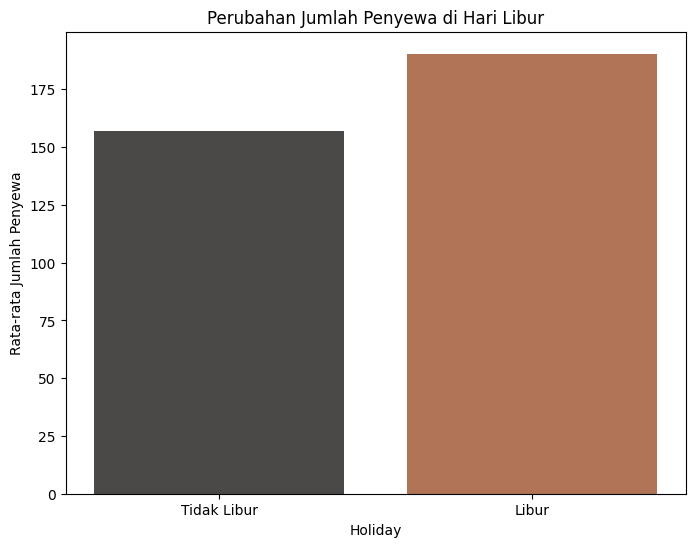

In [28]:
holiday_rental_counts = hour.groupby('holiday')['total_penyewa'].mean()
colors = ['#4A4947', '#B17457']
plt.figure(figsize=(8, 6))
plt.bar(holiday_rental_counts.index, holiday_rental_counts.values, color=colors)
plt.xlabel('Holiday')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.title('Perubahan Jumlah Penyewa di Hari Libur')
plt.xticks(holiday_rental_counts.index, ['Tidak Libur', 'Libur'])
plt.show()


### Pertanyaan 4: Bagaimana tren banyak penyewa sepeda selama tahun 2012?

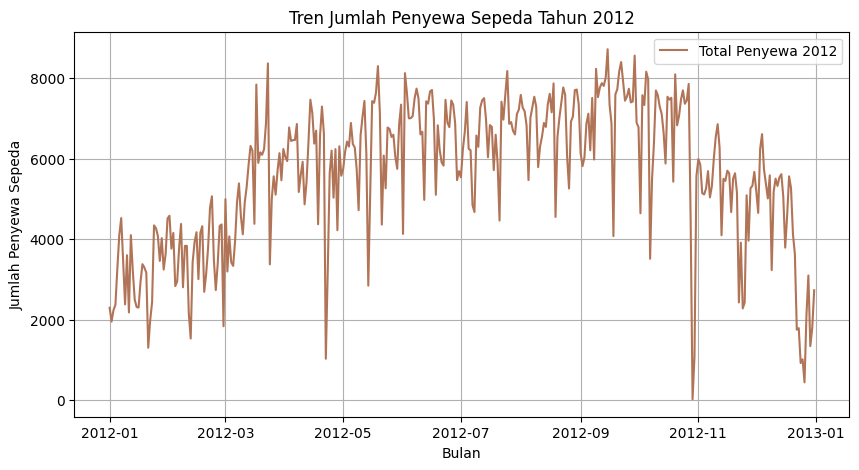

In [29]:
data_2012 = day[day['tahun'] == '2012']
plt.figure(figsize=(10, 5))
plt.plot(data_2012['tanggal'], data_2012['total_penyewa'], color='#B17457', label='Total Penyewa 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.title('Tren Jumlah Penyewa Sepeda Tahun 2012')
plt.grid(True)
plt.legend()
plt.show()


### Pertanyaan 5 : Pukul berapa waktu (jam) paling banyak terjadi transaks sewa sepeda dan paling sedikit tejadi transaksi sewa sepeda?

Jam dengan jumlah penyewa terbanyak: 17 (Jumlah: 336860)
Jam dengan jumlah penyewa tersedikit: 4 (Jumlah: 4428)


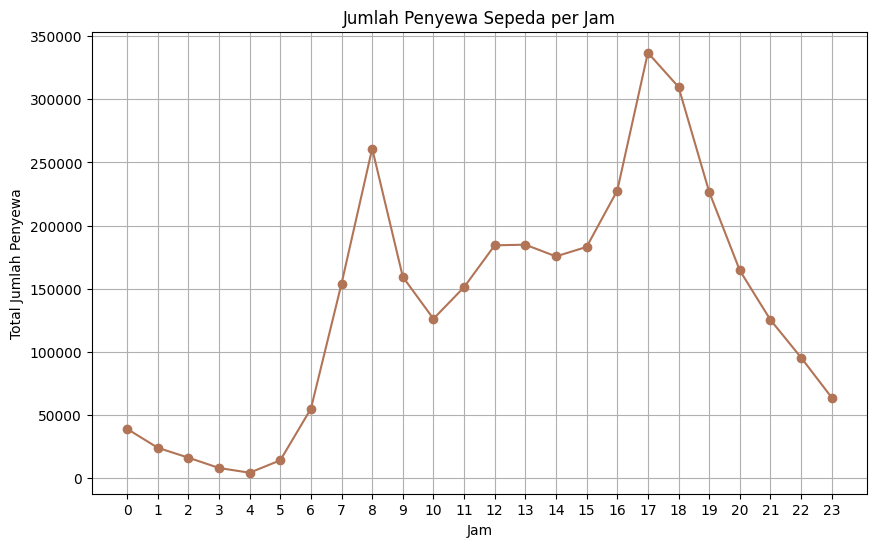

In [30]:
hourly_rental_counts = hour.groupby('jam')['total_penyewa'].sum()
jam_terbanyak = hourly_rental_counts.idxmax()
jumlah_terbanyak = hourly_rental_counts.max()
jam_tersedikit = hourly_rental_counts.idxmin()
jumlah_tersedikit = hourly_rental_counts.min()
print(f"Jam dengan jumlah penyewa terbanyak: {jam_terbanyak} (Jumlah: {jumlah_terbanyak})")
print(f"Jam dengan jumlah penyewa tersedikit: {jam_tersedikit} (Jumlah: {jumlah_tersedikit})")
plt.figure(figsize=(10, 6))
plt.plot(hourly_rental_counts.index, hourly_rental_counts.values, marker='o', color='#B17457')
plt.xlabel('Jam')
plt.ylabel('Total Jumlah Penyewa')
plt.title('Jumlah Penyewa Sepeda per Jam')
plt.grid(True)
plt.xticks(hourly_rental_counts.index)
plt.show()


**Insight:**
- Dilakukan visualisasi data sesuai pertanyaan yang telah dibuat.
- Menyesuaikan jenis plot yang digunakan sesuai dengan pertanyaan yang dibuat.

## Conclusion

**1. Bagaimana suhu (suhu yang dirasakan penyewa) mempengaruhi jumlah penyewa sepeda?**
* Kesimpulan : Titik-titik data tersebar cukup merata, menunjukkan adanya hubungan positif antara suhu terasa dan jumlah penyewa sepeda. Semakin tinggi suhu terasa, cenderung semakin banyak orang yang menyewa sepeda. Oleh karena itu, cuaca yang lebih hangat (suhu terasa lebih tinggi) cenderung lebih banyak orang untuk menyewa sepeda. Pada umumnya orang lebih suka beraktivitas di luar ruangan saat cuaca cerah dan hangat.


---


**2. Bagaimana hubungan kecepatan angin dan kelembapan terhadap jumlah penyewa?**
* Kesimpulan : Terdapat korelasi negatif yang cukup kuat antara kecepatan angin dan jumlah penyewa (nilai -0.23). Ini berarti semakin tinggi kecepatan angin, cenderung semakin sedikit orang yang menyewa sepeda. Korelasi antara kelembaban dan jumlah penyewa sangat lemah (nilai -0.10). Artinya, perubahan tingkat kelembaban tidak memberikan pengaruh yang signifikan terhadap jumlah penyewa sepeda. Terdapat korelasi negatif yang cukup kuat antara kecepatan angin dan kelembaban (nilai -0.25). Ini menunjukkan bahwa ketika kecepatan angin tinggi, cenderung kelembaban udara akan lebih rendah. Oleh karena itu faktor yang paling berpengaruh terhadap jumlah penyewa sepeda adalah kecepatan angin. Semakin rendah kecepatan angin, semakin banyak orang cenderung menyewa sepeda. Faktor kelembaban, berdasarkan data ini, tidak memberikan pengaruh yang signifikan.
---


**3. Bagaimana rata-rata perubahan jumlah penyewa di hari libur?**
* Kesimpulan yang diperoleh dari grafik adalah rata-rata jumlah penyewa pada hari libur jauh lebih tinggi dibandingkan hari biasa. Hal ini ditunjukkan dengan tinggi batang grafik yang lebih mencolok pada kategori "Libur". Rata-rata jumlah penyewa pada hari biasa berada pada level yang lebih rendah.
Oleh karena itu, **hari libur memiliki pengaruh yang signifikan** terhadap peningkatan jumlah penyewa. Kemungkinan alasannya adalah
    1. Waktu luang: Pada hari libur, banyak orang memiliki lebih banyak waktu luang untuk melakukan aktivitas di luar ruangan, termasuk menyewa sesuatu.
    2. Aktivitas rekreasi: Hari libur seringkali dikaitkan dengan aktivitas rekreasi atau liburan, sehingga kebutuhan akan penyewaan barang atau jasa meningkat.

---


**4. Bagaimana tren banyak penyewa sepeda pada tahun 2012?**
* Kesimpulan yang diperoleh dari grafik adalah jumlah penyewa sepeda pada tahun 2012 mengalami peningkatan yang cukup signifikan dari bulan ke bulan. Terdapat periode di mana jumlah penyewa sangat tinggi, dan ada pula periode di mana jumlah penyewa rendah.Secara umum, tidak terlihat adanya tren kenaikan atau penurunan yang teratur sepanjang tahun. Jumlah penyewa cenderung naik turun secara tidak teratur.

---


**5. Pukul berapa waktu (jam) paling banyak terjadi transaksi sewa sepeda dan paling sedikit tejadi transaksi sewa sepeda?**
* Kesimpulan yang dapat diperoleh dari grafik adalah jumlah penyewa mencapai puncaknya pada jam 17 dengan total lebih dari 336.000 penyewa. Ini menunjukkan bahwa sore hari, terutama menjelang malam, adalah waktu di mana permintaan akan penyewaan sepeda paling tinggi.
Sebaliknya, jumlah penyewa paling sedikit terjadi pada jam 4 dini hari dengan kurang dari 5.000 penyewa. Ini menunjukkan bahwa dini hari adalah waktu di mana minat masyarakat untuk menyewa sepeda sangat rendah. Secara umum, jumlah penyewa cenderung meningkat dari pagi menuju sore hari, mencapai puncaknya di sore hari, kemudian menurun drastis pada malam hari. Terdapat peningkatan yang cukup signifikan pada jumlah penyewa dari satu jam ke jam berikutnya.

## Analisis Lanjutan

### Clustering

cluster
0    3768.334764
1    5820.742647
2    3678.827434
Name: total_penyewa, dtype: float64


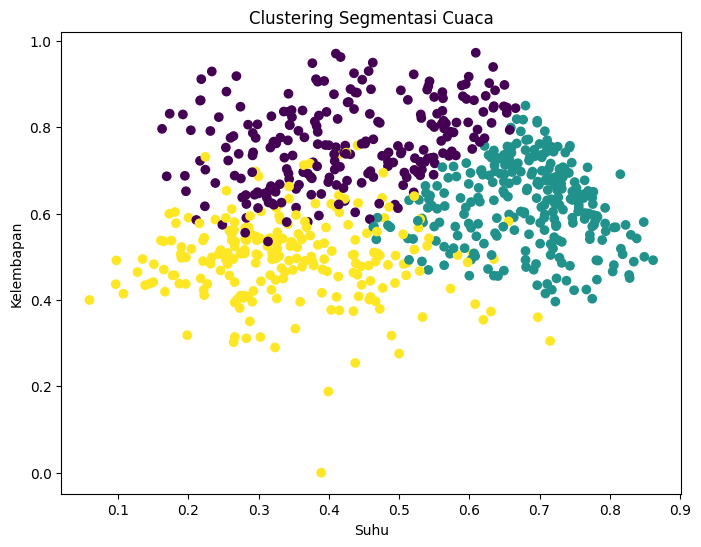

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
weather_features = ['suhu', 'kelembapan', 'kecepatan_angin']
X = day[weather_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
day['cluster'] = kmeans.labels_
cluster_rental_means = day.groupby('cluster')['total_penyewa'].mean()
print(cluster_rental_means)
plt.figure(figsize=(8, 6))
plt.scatter(day['suhu'], day['kelembapan'], c=day['cluster'], cmap='viridis')
plt.xlabel('Suhu')
plt.ylabel('Kelembapan')
plt.title('Clustering Segmentasi Cuaca')
plt.show()


Grafik ini menampilkan hasil dari clustering atau pengelompokan data berdasarkan dua variabel utama, yaitu suhu dan kelembaban. Setiap titik pada grafik mewakili satu data point, dan warna yang berbeda menunjukkan kelompok yang berbeda.
1. Kelompok Ungu: Kelompok ini cenderung memiliki suhu yang lebih tinggi dan kelembaban yang bervariasi.
2. Kelompok Kuning: Kelompok ini cenderung memiliki suhu yang lebih rendah dan kelembaban yang sedang.
3. Kelompok Hijau: Kelompok ini cenderung memiliki suhu yang sedang hingga tinggi dan kelembaban yang tinggi.